on the tweets about U.S. airlines for February, 2015; text processing and sentiment analysis 
was conducted on an original dataset of 50,000 tweets to understand customer sentiment about airlines. 
These original 50,000 points were paired down to 15,000 to reflect overlap and preserve only quality data.

Analysis: 
    Given nearly 15,000 tweets, a sentiment analysis was conducted to interperet 
and understand feelings towards different airlines. NLTK in python was used to derive the 
sentiment as well as the confidence. The analysis looked at tweets about six major US airlines; 
American, Southwest, United, Delta, Southwest, U.S. Airways, and Virgin America, during the 
course of February, 2015.

The output contains the following variables:
- tweet_id: A unique identifier for each tweet
- airline_sentiment: The sentiment, with choices "neutral","positive", or "negative".
- airline_sentiment_confidence: Level of confidence in the outcome
- negativereason: Negative comment, if it can be discerned
- negativereason_confidence: Level of confidence for if the tweet is in fact negative or not
- airline: The name of the airline
- airline_sentiment_gold
- name: The twitter handle of the user
- negativereason_gold
- retweet_count
- text: The text of the tweet
- tweet_coord
- tweet_created
- tweet_location
- user_timezone

Tasks
- Optional: Upload csv to postgres database
- Conduct hierarchical clustering of tweets either words/sentiment or
- Using the results of the analysis, create a Tableau dashboard that illustrates the data.
- Afterwards, prepare a brief summary for each of these key stakeholders:
- The client, who wants to visually understand consumer sentiment
- Your boss, who wants to understand the process
- Bonus Convert the categorical variables to numeric and conduct a Principal Componant Analysis on the data.


In [435]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, homogeneity_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_extraction import text
import numpy as np
%matplotlib inline

In [403]:
import pandas as pd 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import f_classif, SelectKBest, VarianceThreshold
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster, cophenet

from scipy.spatial import distance as ssd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster

%matplotlib inline

In [413]:
df = pd.read_csv("twitter.csv")
data = pd.read_csv("twitter.csv")

In [414]:
df.shape

(14640, 15)

In [415]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [272]:
import re

In [321]:
columns_to_keep = [u'airline_sentiment', u'airline', u'text','negativereason']

df = data[columns_to_keep]

#df.loc[:,'sentiment'] = df.airline_sentiment.map({'negative':0,'neutral':2,'positive':4})
#df = df.drop(['airline_sentiment'], axis=1)


In [322]:
df.head()

airline_sentiment         airline  \
0           neutral  Virgin America   
1          positive  Virgin America   
2           neutral  Virgin America   
3          negative  Virgin America   
4          negative  Virgin America   

                                                text negativereason  
0                @VirginAmerica What @dhepburn said.            NaN  
1  @VirginAmerica plus you've added commercials t...            NaN  
2  @VirginAmerica I didn't today... Must mean I n...            NaN  
3  @VirginAmerica it's really aggressive to blast...     Bad Flight  
4  @VirginAmerica and it's a really big bad thing...     Can't Tell

In [323]:
df.text = [(" ").join(x.replace("@","").split()[1:]) for x in df.text]

In [324]:
df.head()

airline_sentiment         airline  \
0           neutral  Virgin America   
1          positive  Virgin America   
2           neutral  Virgin America   
3          negative  Virgin America   
4          negative  Virgin America   

                                                text negativereason  
0                                What dhepburn said.            NaN  
1  plus you've added commercials to the experienc...            NaN  
2  I didn't today... Must mean I need to take ano...            NaN  
3  it's really aggressive to blast obnoxious "ent...     Bad Flight  
4           and it's a really big bad thing about it     Can't Tell

In [327]:
x = df.text

In [325]:
# divide tweets in 2 dataframes according to positive or negative sentiment
positive = data[data['airline_sentiment'] == 'positive']
negative = data[data['airline_sentiment'] == 'negative']
print "Positive tweets: ",len(positive)
print "Negative tweets: ",len(negative)

Positive tweets:  2363
Negative tweets:  9178


In [331]:
pos_x = positive.text
neg_x = negative.text

In [381]:
v = CountVectorizer(stop_words='english', token_pattern='[a-zA-Z]{4,50}',max_features=50)

In [388]:
p_vec = v.fit(pos_x)
n_vec = v.fit(neg_x)

In [394]:
p_vec.vocabulary_

{u'agent': 0,
 u'airline': 1,
 u'airport': 2,
 u'americanair': 3,
 u'bags': 4,
 u'cancelled': 5,
 u'change': 6,
 u'customer': 7,
 u'days': 8,
 u'delay': 9,
 u'delayed': 10,
 u'flight': 11,
 u'flighted': 12,
 u'flightled': 13,
 u'flights': 14,
 u'gate': 15,
 u'going': 16,
 u'guys': 17,
 u'help': 18,
 u'hold': 19,
 u'hour': 20,
 u'hours': 21,
 u'http': 22,
 u'jetblue': 23,
 u'just': 24,
 u'late': 25,
 u'like': 26,
 u'lost': 27,
 u'luggage': 28,
 u'make': 29,
 u'minutes': 30,
 u'need': 31,
 u'people': 32,
 u'phone': 33,
 u'plane': 34,
 u'really': 35,
 u'seat': 36,
 u'service': 37,
 u'southwestair': 38,
 u'thanks': 39,
 u'time': 40,
 u'today': 41,
 u'told': 42,
 u'trying': 43,
 u'united': 44,
 u'usairways': 45,
 u'wait': 46,
 u'waiting': 47,
 u'weather': 48,
 u'worst': 49}

In [416]:
df = df.drop(['airline_sentiment_gold', 'negativereason_gold'], axis=1)

In [417]:
le = LabelEncoder()
y = le.fit_transform(df['airline_sentiment'])

X_train, X_test, y_train, y_test = train_test_split(df['text'], y, stratify=y, test_size=0.33, random_state=42)

In [436]:
carriers = ['virginamerica', 'americanair','united', 'southwest', 'southwestair', 'delta', 'usairways','american']

v = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(carriers),
                      token_pattern='[a-zA-Z]{3,50}',ngram_range=(1,3), min_df=1, max_df=0.6, sublinear_tf=True)
v.fit(df['text'])
X_train2 = v.transform(X_train)
X_test2 = v.transform(X_test)
X_all2 = v.transform(df['text'])

In [437]:
lr = LogisticRegression(multi_class='multinomial', solver='sag', random_state=42)
gs = GridSearchCV(lr, param_grid={'C':[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]}, cv=5)
gs.fit(X_train2, y_train)
gs.best_params_

{'C': 1000.0}

In [444]:
lr = LogisticRegression(C=1000.0, multi_class='multinomial', solver='sag', random_state=42)
lr.fit(X_train2, y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [445]:
y_pred = lr.predict(X_test2)
lr.score(X_test2, y_test)

0.7491721854304636

In [441]:
print confusion_matrix(y_test, y_pred)

[[2909   95   25]
 [ 625  357   41]
 [ 292  134  354]]


In [448]:
v = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(carriers), 
                      token_pattern='[a-zA-Z]{3,50}',ngram_range=(1,2), 
                      min_df=2, max_df=0.8,vocabulary=imp[0])
X = v.fit_transform(df['text'])
X_dense = pd.DataFrame(X.todense())
vocab = v.vocabulary_
X_dense.columns = vocab

In [456]:
scaler = StandardScaler(with_mean=False)


trunc = TruncatedSVD(n_components=43)

truncy = pd.DataFrame(trunc.fit_transform(X))

In [458]:
km = AgglomerativeClustering(n_clusters=3)
km.fit(truncy)
labels = pd.DataFrame(km.labels_)

In [461]:
y_pred = np.choose(labels, [0,1,2])
le = LabelEncoder()
df['airline_sentiment'] = le.fit_transform(df['airline_sentiment'])
print classification_report(df['airline_sentiment'], y_pred)
print confusion_matrix(df['airline_sentiment'], y_pred)
print 'Homogeneity Score:', homogeneity_score(df['airline_sentiment'], y_pred[0])
print 'Rand:', adjusted_rand_score(df['airline_sentiment'], y_pred[0])

             precision    recall  f1-score   support

          0       0.66      0.97      0.79      9178
          1       0.56      0.11      0.19      3099
          2       0.66      0.13      0.22      2363

avg / total       0.64      0.66      0.57     14640

[[8929  172   77]
 [2659  356   84]
 [1947  107  309]]
Homogeneity Score: 0.0414592728345
Rand: 0.0992479941285


In [356]:
km = KMeans(n_clusters=7)
km.fit(truncy, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [357]:
labels = pd.DataFrame(km.labels_)

In [362]:
thing = pd.concat([pd.DataFrame(y_train), truncy, labels], axis=1)
thing.columns = ['y', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'labels']

In [111]:
Mood_count=data['airline_sentiment'].value_counts()

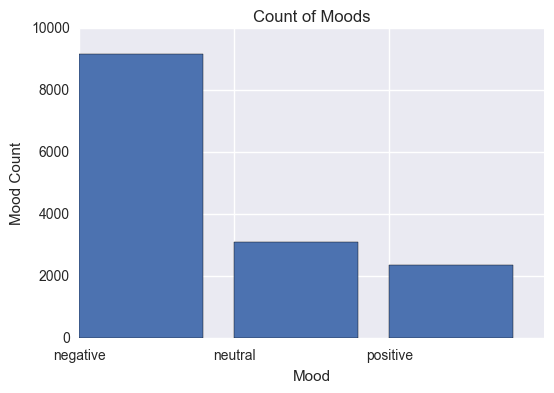

In [117]:
plt.bar([1,2,3],Mood_count)
plt.xticks([1,2,3],['negative','neutral','positive'])
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

An overwhelming amount of the tweets are negative

In [112]:
df.head()

retweet_count         airline  \
0              0  Virgin America   
1              0  Virgin America   
2              0  Virgin America   
3              0  Virgin America   
4              0  Virgin America   

                                                text  sentiment  
0                @VirginAmerica What @dhepburn said.          2  
1  @VirginAmerica plus you've added commercials t...          4  
2  @VirginAmerica I didn't today... Must mean I n...          2  
3  @VirginAmerica it's really aggressive to blast...          0  
4  @VirginAmerica and it's a really big bad thing...          0

In [102]:
x = df.text

In [241]:
v.fit(df.text)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='[a-zA-Z]{4,50}', tokenizer=None,
        vocabulary=None)

In [262]:
q = v.vocabulary_
p = []


In [265]:
dfff = pd.DataFrame(q, index=[i in range(len(q))])

In [136]:
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [156]:
airlines = data.airline.unique()

In [169]:
def negative_count(airline):
    if airline == 'All':
        df = data
    else:
        df = data[data['airline'] == airline]
    count = dict(df['negativereason'].value_counts())
    reason = list(data['negativereason'].unique())
    reason = [x for x in reason if str(x) != 'nan']
    reasonDF = pd.DataFrame({'Reasons': reason})
    reasonDF['count'] = reasonDF['Reasons'].apply(lambda x: count[x])
    return reasonDF

In [170]:
def plots_negatives(airline):
    df = negative_count(airline)
    count = df['count']
    idx = range(1,(len(df)+1))
    plt.bar(idx,count)
    plt.xticks(idx,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+ airline)

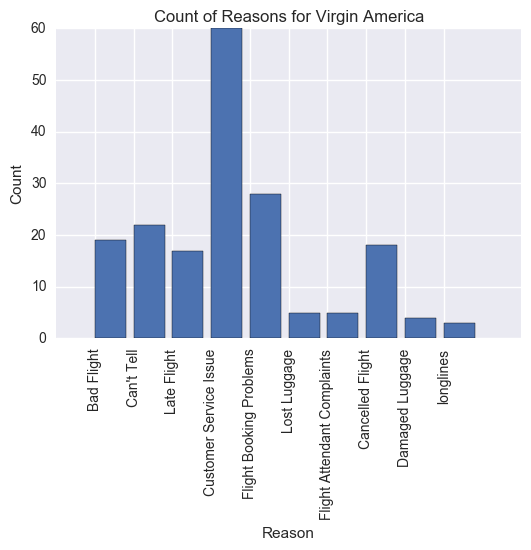

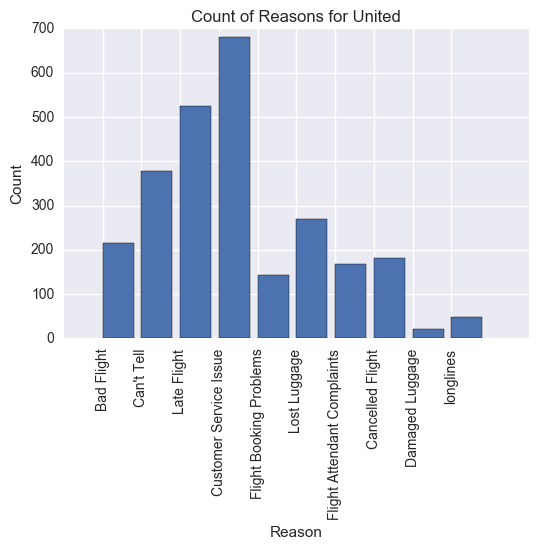

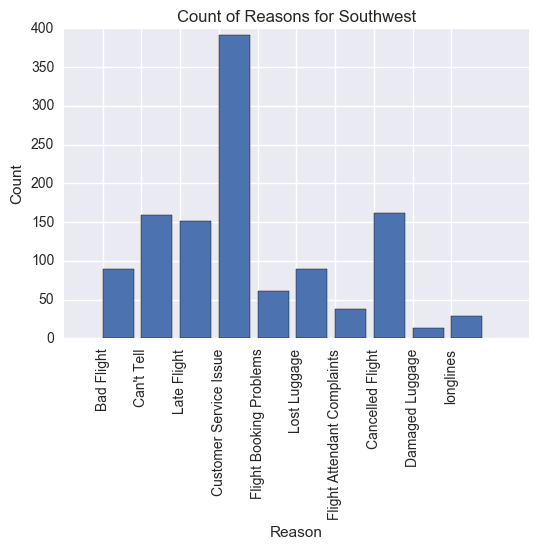

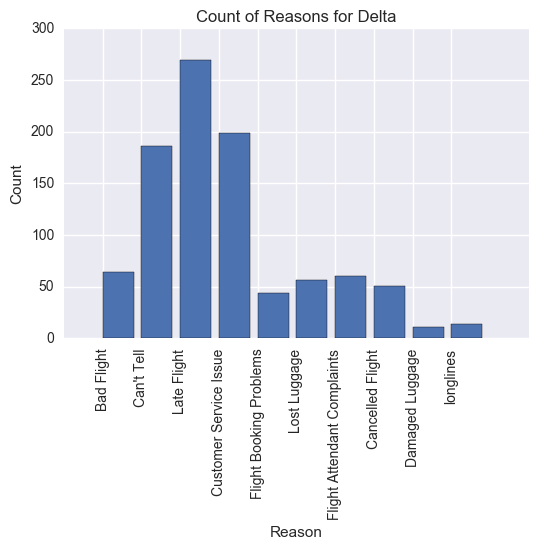

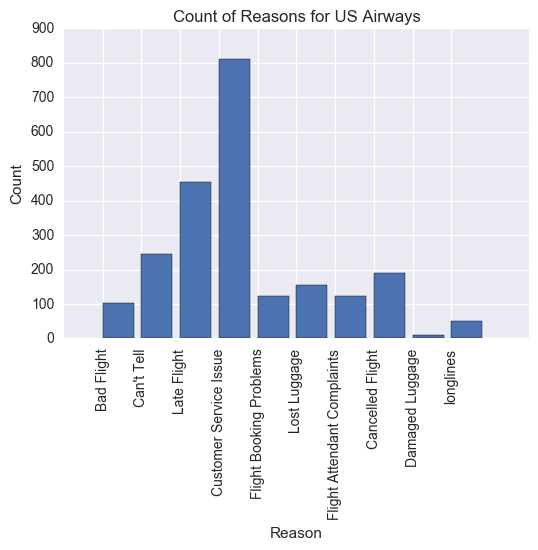

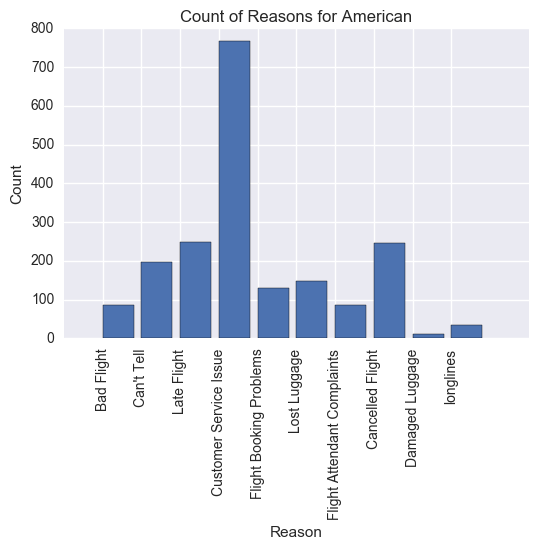

In [171]:
for i in airlines:
    plots_negatives(i)
    plt.show()

In [173]:
from wordcloud import WordCloud,STOPWORDS


In [183]:
data[data['airline_sentiment'] == 'negative']

tweet_id airline_sentiment  airline_sentiment_confidence  \
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
5      570300767074181121          negative                        1.0000   
15     570282469121007616          negative                        0.6842   
17     570276917301137409          negative                        1.0000   
20     570265883513384960          negative                        0.6705   
24     570256553502068736          negative                        1.0000   
25     570249102404923392          negative                        1.0000   
26     570239632807370753          negative                        1.0000   
28     570207886493782019          negative                        1.0000   
30     570114021854212096          negative                        1.0000   
32     570088404156698625          negative                        1.0000   
33     570084582780899328          negative                        1.0000   
39     570035876845084672          negative                        1.0000   
41     570025482344898560          negative                        0.6688   
55     569996412286582784          negative                        0.6939   
61     569989034501500928          negative                        1.0000   
66     569976620158578688          negative                        1.0000   
67     569973821396152323          negative                        1.0000   
69     569967019958730753          negative                        1.0000   
73     569946362126602240          negative                        1.0000   
78     569935232033366017          negative                        1.0000   
80     569933816963342337          negative                        1.0000   
82     569933405506310144          negative                        0.6792   
83     569933360564342784          negative                        1.0000   
84     569929243146088448          negative                        1.0000   
85     569926998824394752          negative                        1.0000   
89     569919041244147712          negative                        1.0000   
92     569911816937033728          negative                        1.0000   
93     569911674158731264          negative                        1.0000   
...                   ...               ...                           ...   
14595  569593694963310593          negative                        0.6541   
14596  569593346223579137          negative                        1.0000   
14597  569593278636675072          negative                        1.0000   
14599  569593045777321985          negative                        1.0000   
14601  569592830307508224          negative                        1.0000   
14603  569592674400907264          negative                        0.6788   
14604  569592590632247297          negative                        0.6440   
14605  569592447455465472          negative                        1.0000   
14606  569592402085847041          negative                        1.0000   
14608  569592177312923650          negative                        1.0000   
14609  569592148338876416          negative                        1.0000   
14610  569591765793165312          negative                        1.0000   
14612  569591700416393216          negative                        1.0000   
14613  569591653121597440          negative                        1.0000   
14614  569591540944756737          negative                        1.0000   
14615  569591533617307648          negative                        1.0000   
14616  569591393540288512          negative                        1.0000   
14618  569591136534319105          negative                        1.0000   
14620  569590965880532993          negative                        1.0000   
14621  569590892085915649          negative                        1.0000   
14622  569590

In [187]:
df = data[data['airline_sentiment'] == 'negative']
words = ' '.join(df['text'])
clean_word = " ".join([word for word in words.split() if word != 'RT' and 'http' not in word
                            and not word.startswith('@')])

In [188]:
wordcloud = WordCloud(stopwords=STOPWORDS,width=3000,height=2500).generate(clean_word)

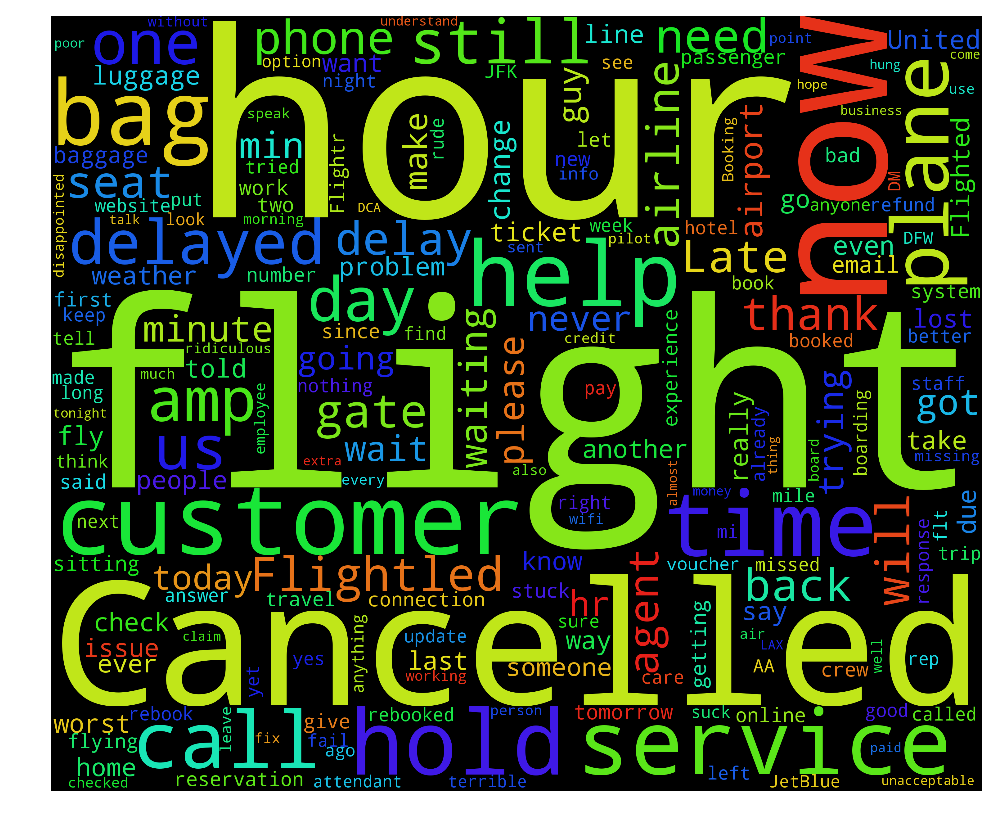

In [189]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [342]:
df = data[data['airline_sentiment'] == 'positive']
words = ' '.join(df['text'])
cleanword = " ".join([word for word in words.split() if word != 'RT' and 'http' not in word
                         and not word.startswith('@')])

In [343]:
wordcloud = WordCloud(stopwords=STOPWORDS,width=3000,height=2500).generate(cleanword)

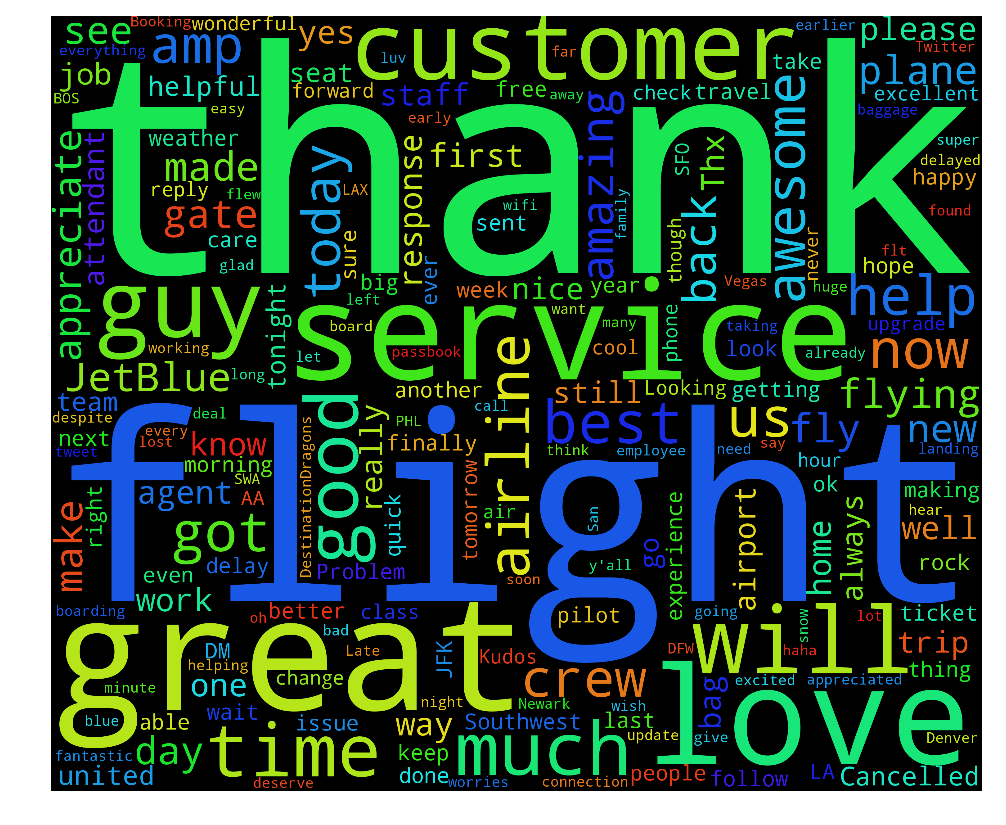

In [344]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [194]:
data['sentiment']=data['airline_sentiment'].apply(lambda x: 0 if x == 'negative' else 1)

In [195]:
data.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

   sentiment  
0          1  
1          1  
2          1  
3          0  
4          0